In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])


# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4444 - loss: 11.3666
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - accuracy: 0.5556 - loss: 693.1409
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step - accuracy: 0.5556 - loss: 294.2533
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step - accuracy: 0.8889 - loss: 4.0341
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 0.4444 - loss: 116.7649
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.4444 - loss: 96.3497
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5556 - loss: 24.3574
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.6667 - loss: 11.7621
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 0.6111 - loss: 19.8136
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7778 - loss: 7.5941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6000 - loss: 16.8195
Test accuracy: 0.6000000238418579


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])

# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Function for prediction
def predict_apple_health(image_path):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['healthy', 'rot']
    predicted_class = class_labels[class_index]
    return predicted_class

# Get user input and make prediction
user_image_path = input("Enter the path to your apple image: ")
predicted_health = predict_apple_health(

SyntaxError: incomplete input (<ipython-input-13-13478f0ec138>, line 88)

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])

# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 43.3720
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step - accuracy: 0.5556 - loss: 816.1288
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 570.1792
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 218.6331
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - accuracy: 0.7778 - loss: 9.9340
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.4444 - loss: 95.1970
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 94.1927
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.5556 - loss: 42.0524
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.8889 - loss: 9.9858
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.5556 - loss: 38.9201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4000 - loss: 45.4652
Test accuracy: 0.4000000059604645


In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])

# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Function for prediction
def predict_apple_health(image_path):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['healthy', 'rot']
    predicted_class = class_labels[class_index]
    return predicted_class

# Get user input and make prediction
user_image_path

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 65.4430
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - accuracy: 0.5556 - loss: 873.8477
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5556 - loss: 619.6162
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.5556 - loss: 251.6698
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.8889 - loss: 4.5248
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.4444 - loss: 106.2670
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 115.6185
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step - accuracy: 0.4444 - loss: 80.0299
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4444 - loss: 35.8813
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - accuracy: 0.8333 - loss: 2.5690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.4000 - loss: 29.7047
Test accuracy: 0.4000000059604645


NameError: name 'user_image_path' is not defined

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await

SyntaxError: incomplete input (<ipython-input-15-0b2ac411d224>, line 15)

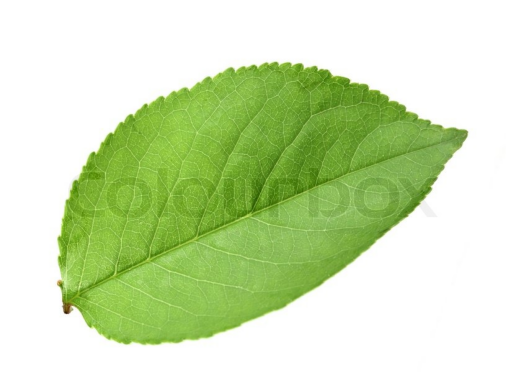

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/apple/AppleHealthy(1).jpg'

# Read the image using mpimg.imread
image = mpimg.imread(image_path)

# Display the image using plt.imshow
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder path
folder_path = '/content/drive/MyDrive/apple/Apple Black rot'

# Get a list of all image files in the folder
image_files = [
    f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))
]

# Iterate through the image files and display each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = mpimg.imread(image_path)
    plt.figure()  # Create a new figure for each image
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_file)  # Set title as the image filename
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = mpimg.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            # Assuming folder names indicate labels (e.g., "healthy", "rot")
            labels.append(os.path.basename(folder_path))
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Assuming you want to convert labels to numerical values (e.g., 0 for healthy, 1 for rot)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Now you have images and labels ready for model training

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (23,) + inhomogeneous part.

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image  # Import the PIL library

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)): # Set a target size for images
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            # Open the image using PIL
            img = Image.open(img_path)
            # Resize the image to the target size
            img = img.resize(target_size)
            # Convert the image to a NumPy array
            img_array = np.array(img)
            # Check if the image has 3 channels (RGB)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# ... (rest of your code)

In [ ]:
import tensorflow as tf

# Create a simple CNN model (customize as needed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(images, labels, epochs=10, batch_size=32)  # Adjust epochs and batch size

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=[array([[[ 77,  69,  49],
        [ 81,  74,  56],
        [ 87,  79,  63],
        ...,
        [173, 179, 199],
        [175, 182, 202],
        [178, 186, 205]],

       [[ 81,  72,  53],
        [ 87,  78,  61],
        [ 92,  84,  67],
        ...,
        [179, 186, 205],
        [181, 188, 207],
        [182, 189, 208]],

       [[ 89,  80,  62],
        [ 95,  85,  68],
        [ 97,  88,  72],
        ...,
        [186, 193, 211],
        [188, 194, 213],
        [189, 194, 213]],

       ...,

       [[ 65,  63,  52],
        [ 64,  62,  49],
        [ 64,  62,  50],
        ...,
        [ 45,  41,  43],
        [ 52,  48,  53],
        [ 57,  52,  58]],

       [[ 58,  56,  45],
        [ 56,  54,  43],
        [ 56,  54,  43],
        ...,
        [ 61,  55,  57],
        [ 63,  56,  62],
        [ 70,  63,  69]],

       [[ 47,  45,  36],
        [ 50,  47,  38],
        [ 49,  48,  38],
        ...,
        [ 65,  56,  59],
        [ 68,  59,  64],
        [ 78,  69,  77]]], dtype=uint8), array([[[176, 167, 157],
        [173, 164, 154],
        [170, 159, 147],
        ...,
        [155, 153, 146],
        [155, 153, 147],
        [150, 147, 142]],

       [[185, 177, 168],
        [184, 175, 167],
        [177, 168, 159],
        ...,
        [159, 157, 150],
        [160, 158, 153],
        [160, 158, 153]],

       [[182, 173, 164],
        [179, 170, 162],
        [174, 165, 156],
        ...,
        [154, 151, 146],
        [155, 151, 148],
        [156, 153, 148]],

       ...,

       [[254, 239, 236],
        [254, 237, 235],
        [254, 236, 233],
        ...,
        [137, 123, 114],
        [133, 118, 109],
        [132, 117, 107]],

       [[254, 239, 236],
        [254, 238, 236],
        [254, 235, 232],
        ...,
        [127, 109,  99],
        [129, 112, 102],
        [131, 114, 103]],

       [[254, 238, 236],
        [254, 238, 236],
        [254, 233, 231],
        ...,
        [128, 111, 102],
        [130, 113, 105],
        [129, 112, 104]]], dtype=uint8), array([[[136, 201,  45],
        [136, 201,  45],
        [140, 202,  46],
        ...,
        [ 97, 180,  15],
        [ 96, 177,  15],
        [ 93, 174,  13]],

       [[136, 201,  45],
        [137, 202,  45],
        [142, 202,  46],
        ...,
        [ 96, 179,  15],
        [ 94, 175,  13],
        [ 92, 173,  13]],

       [[136, 203,  45],
        [138, 202,  45],
        [143, 202,  46],
        ...,
        [ 95, 177,  14],
        [ 92, 174,  12],
        [ 90, 171,  12]],

       ...,

       [[149, 205,  77],
        [203, 219, 167],
        [205, 207, 178],
        ...,
        [211, 243, 120],
        [212, 245, 123],
        [211, 243, 124]],

       [[152, 206,  82],
        [205, 219, 171],
        [203, 206, 175],
        ...,
        [211, 244, 119],
        [215, 246, 128],
        [215, 245, 131]],

       [[157, 208,  91],
        [206, 219, 175],
        [202, 205, 173],
        ...,
        [210, 244, 116],
        [215, 247, 130],
        [221, 247, 138]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[210, 205, 212],
        [209, 204, 211],
        [209, 204, 211],
        ...,
        [210, 205, 212],
        [209, 204, 211],
        [209, 204, 211]],

       [[210, 205, 212],
        [212, 207, 214],
        [212, 207, 214],
        ...,
        [207, 202, 209],
        [209, 204, 211],
        [216, 211, 218]],

       [[212, 207, 214],
        [213, 208, 215],
        [211, 206, 213],
        ...,
        [207, 202, 209],
        [205, 200, 207],
        [205, 200, 207]],

       ...,

       [[135, 124, 132],
        [136, 125, 133],
        [138, 127, 135],
        ...,
        [127, 115, 125],
        [133, 121, 131],
        [136, 124, 134]],

       [[137, 126, 134],
        [130, 119, 127],
        [129, 118, 126],
        ...,
        [137, 125, 135],
        [137, 125, 135],
        [138, 126, 136]],

       [[135, 124, 132],
        [134, 123, 131],
        [136, 125, 133],
        ...,
        [140, 128, 138],
        [134, 122, 132],
        [134, 122, 132]]], dtype=uint8), array([[[102,  95,  88],
        [116, 110, 107],
        [145, 144, 148],
        ...,
        [127, 144, 102],
        [111, 132,  89],
        [110, 133,  87]],

       [[116, 106,  99],
        [130, 123, 119],
        [157, 155, 158],
        ...,
        [146, 159, 118],
        [127, 146, 105],
        [111, 133,  89]],

       [[131, 119, 112],
        [140, 132, 126],
        [147, 140, 135],
        ...,
        [161, 174, 126],
        [148, 164, 116],
        [133, 151, 105]],

       ...,

       [[118, 105,  98],
        [131, 120, 113],
        [129, 121, 113],
        ...,
        [ 83, 109,  36],
        [ 86, 111,  41],
        [ 91, 116,  47]],

       [[114,  99,  91],
        [129, 115, 107],
        [131, 124, 113],
        ...,
        [ 93, 119,  44],
        [ 96, 121,  49],
        [104, 128,  58]],

       [[125, 111, 103],
        [131, 121, 111],
        [132, 131, 112],
        ...,
        [ 88, 115,  33],
        [ 86, 114,  32],
        [ 86, 114,  29]]], dtype=uint8), array([[[130, 109, 104],
        [143, 122, 117],
        [132, 111, 106],
        ...,
        [126, 105, 100],
        [132, 111, 106],
        [126, 105, 100]],

       [[125, 104,  99],
        [134, 113, 108],
        [143, 122, 117],
        ...,
        [120,  99,  94],
        [124, 103,  98],
        [114,  93,  88]],

       [[137, 116, 111],
        [133, 112, 107],
        [140, 119, 114],
        ...,
        [131, 110, 105],
        [124, 103,  98],
        [130, 109, 104]],

       ...,

       [[181, 166, 163],
        [182, 167, 164],
        [173, 158, 155],
        ...,
        [180, 165, 162],
        [179, 164, 161],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [181, 166, 163],
        ...,
        [179, 164, 161],
        [180, 165, 162],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [178, 163, 160],
        ...,
        [175, 160, 157],
        [178, 163, 160],
        [181, 166, 163]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 254, 252],
        [223, 233, 193],
        ...,
        [223, 223, 223],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[126, 181, 124],
        [ 62, 119,  63],
        [ 30,  87,  35],
        ...,
        [196, 218, 187],
        [192, 219, 183],
        [188, 220, 181]],

       [[122, 176, 120],
        [ 56, 112,  57],
        [ 46, 101,  50],
        ...,
        [195, 223, 185],
        [186, 221, 176],
        [175, 214, 166]],

       [[ 94, 143,  91],
        [ 44,  94,  43],
        [ 55, 108,  58],
        ...,
        [193, 231, 182],
        [180, 225, 167],
        [165, 216, 151]],

       ...,

       [[108, 154,  97],
        [115, 165, 104],
        [122, 176, 113],
        ...,
        [121, 130,  76],
        [112, 115,  66],
        [111, 112,  65]],

       [[109, 156,  99],
        [116, 166, 108],
        [125, 177, 116],
        ...,
        [107, 123,  67],
        [ 97, 104,  53],
        [108, 114,  65]],

       [[110, 157, 100],
        [117, 167, 109],
        [126, 178, 117],
        ...,
        [ 89, 110,  51],
        [ 90, 101,  48],
        [121, 129,  78]]], dtype=uint8), array([[[ 88, 150,  42],
        [ 86, 148,  40],
        [ 81, 142,  42],
        ...,
        [126, 114,  89],
        [134, 122,  95],
        [141, 130, 102]],

       [[ 87, 149,  42],
        [ 89, 150,  45],
        [ 82, 141,  45],
        ...,
        [121, 109,  84],
        [128, 117,  90],
        [135, 124,  96]],

       [[ 90, 152,  46],
        [ 87, 148,  47],
        [ 84, 142,  53],
        ...,
        [114, 102,  77],
        [121, 110,  83],
        [128, 117,  89]],

       ...,

       [[ 90, 129,  59],
        [111, 157,  77],
        [110, 154,  79],
        ...,
        [115,  96,  92],
        [109,  90,  86],
        [108,  89,  85]],

       [[137, 172,  93],
        [114, 160,  81],
        [118, 163,  89],
        ...,
        [111,  92,  88],
        [107,  88,  84],
        [107,  88,  84]],

       [[127, 166,  81],
        [ 81, 135,  56],
        [ 73, 125,  49],
        ...,
        [109,  90,  86],
        [106,  87,  83],
        [107,  88,  84]]], dtype=uint8), array([[[  9,   8,   6],
        [  8,   7,   5],
        [  8,   7,   7],
        ...,
        [138, 126, 123],
        [136, 123, 122],
        [123, 111, 107]],

       [[ 10,   8,   7],
        [  8,   7,   6],
        [  7,   7,   7],
        ...,
        [137, 128, 127],
        [156, 148, 149],
        [138, 132, 130]],

       [[  8,   7,   6],
        [  7,   7,   6],
        [  8,   8,   8],
        ...,
        [148, 143, 140],
        [145, 141, 138],
        [133, 131, 130]],

       ...,

       [[178, 174, 179],
        [160, 159, 172],
        [175, 176, 189],
        ...,
        [202, 205, 216],
        [182, 186, 197],
        [188, 193, 205]],

       [[160, 158, 171],
        [164, 167, 179],
        [196, 198, 211],
        ...,
        [183, 186, 197],
        [187, 189, 200],
        [180, 182, 194]],

       [[160, 162, 176],
        [213, 217, 230],
        [177, 180, 193],
        ...,
        [173, 175, 184],
        [173, 175, 183],
        [175, 178, 188]]], dtype=uint8), array([[[158, 190,  75],
        [156, 190,  73],
        [158, 193,  82],
        ...,
        [102, 146,  68],
        [ 98, 142,  65],
        [ 94, 137,  60]],

       [[158, 193,  84],
        [164, 198,  89],
        [167, 197,  92],
        ...,
        [104, 147,  68],
        [ 97, 140,  61],
        [ 90, 133,  53]],

       [[155, 190,  74],
        [164, 198,  85],
        [163, 193,  86],
        ...,
        [ 89, 131,  55],
        [ 90, 133,  56],
        [ 84, 130,  49]],

       ...,

       [[109, 128,  62],
        [120, 130,  75],
        [127, 134,  90],
        ...,
        [ 54, 105,  15],
        [ 52, 102,  12],
        [ 54, 103,  13]],

       [[103, 127,  60],
        [112, 128,  72],
        [123, 132,  91],
        ...,
        [ 62, 110,  21],
        [ 55, 103,  12],
        [ 56, 104,  12]],

       [[100, 127,  59],
        [107, 128,  73],
        [127, 139, 106],
        ...,
        [ 57, 105,  19],
        [ 58, 106,  16],
        [ 60, 104,  14]]], dtype=uint8), array([[[214, 215, 215],
        [218, 220, 219],
        [222, 223, 224],
        ...,
        [159, 220, 158],
        [158, 220, 155],
        [155, 219, 149]],

       [[214, 215, 214],
        [218, 220, 220],
        [222, 224, 223],
        ...,
        [165, 225, 164],
        [162, 223, 160],
        [160, 221, 155]],

       [[214, 215, 216],
        [218, 220, 220],
        [223, 224, 224],
        ...,
        [170, 228, 170],
        [166, 226, 166],
        [163, 224, 163]],

       ...,

       [[226, 221, 222],
        [222, 216, 219],
        [220, 214, 215],
        ...,
        [251, 251, 253],
        [252, 252, 253],
        [249, 250, 252]],

       [[226, 221, 222],
        [222, 217, 218],
        [221, 216, 217],
        ...,
        [248, 247, 252],
        [249, 248, 252],
        [245, 245, 250]],

       [[226, 220, 221],
        [222, 216, 218],
        [222, 216, 217],
        ...,
        [244, 243, 248],
        [245, 244, 249],
        [242, 241, 246]]], dtype=uint8), array([[[148, 146,  87],
        [141, 140,  80],
        [134, 137,  76],
        ...,
        [ 39,  44,  20],
        [ 42,  48,  22],
        [ 44,  50,  25]],

       [[149, 147,  90],
        [142, 141,  84],
        [134, 138,  79],
        ...,
        [ 33,  38,  15],
        [ 35,  40,  17],
        [ 38,  43,  20]],

       [[142, 143,  86],
        [135, 137,  80],
        [129, 134,  76],
        ...,
        [ 29,  33,  12],
        [ 30,  35,  14],
        [ 32,  37,  16]],

       ...,

       [[ 32,  48,  13],
        [ 32,  48,  13],
        [ 33,  50,  15],
        ...,
        [114, 126,  58],
        [118, 129,  61],
        [126, 135,  68]],

       [[ 35,  51,  15],
        [ 33,  49,  13],
        [ 34,  51,  15],
        ...,
        [116, 129,  60],
        [120, 131,  62],
        [126, 136,  67]],

       [[ 38,  54,  17],
        [ 36,  52,  15],
        [ 37,  55,  17],
        ...,
        [120, 133,  64],
        [123, 136,  66],
        [127, 138,  69]]], dtype=uint8), array([[[ 86,  99,  73],
        [ 93, 107,  79],
        [ 80,  92,  65],
        ...,
        [ 57,  66,  49],
        [ 58,  69,  49],
        [ 76,  98,  62]],

       [[ 77,  88,  59],
        [ 83,  95,  69],
        [ 89, 102,  75],
        ...,
        [ 57,  66,  49],
        [ 58,  68,  48],
        [ 74,  95,  59]],

       [[160, 174, 147],
        [ 80,  98,  71],
        [ 74,  85,  62],
        ...,
        [ 56,  66,  49],
        [ 59,  67,  48],
        [ 72,  89,  55]],

       ...,

       [[231, 163, 101],
        [178, 191, 117],
        [165, 201, 125],
        ...,
        [ 85, 104,  52],
        [104, 133,  59],
        [127, 161,  78]],

       [[222, 167, 105],
        [186, 204, 138],
        [178, 215, 147],
        ...,
        [ 99, 125,  55],
        [118, 150,  67],
        [129, 157,  89]],

       [[222, 171, 107],
        [190, 207, 132],
        [181, 214, 141],
        ...,
        [108, 143,  62],
        [122, 154,  79],
        [127, 150,  98]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]]], dtype=uint8), array([[[ 52,  21,   1],
        [ 51,  21,   1],
        [ 52,  23,   0],
        ...,
        [102, 181,  19],
        [104, 183,  18],
        [104, 185,  18]],

       [[ 40,  16,   2],
        [ 42,  18,   2],
        [ 43,  21,   4],
        ...,
        [103, 184,  11],
        [106, 188,  14],
        [108, 191,  14]],

       [[ 16,   4,   0],
        [ 19,   7,   1],
        [ 22,   9,   2],
        ...,
        [104, 186,  11],
        [108, 190,  15],
        [110, 193,  17]],

       ...,

       [[ 68, 125,  32],
        [ 59, 116,  26],
        [ 54, 112,  26],
        ...,
        [164, 236, 118],
        [162, 234, 117],
        [161, 233, 116]],

       [[ 66, 123,  29],
        [ 61, 118,  28],
        [ 60, 119,  32],
        ...,
        [158, 229, 110],
        [159, 230, 112],
        [161, 231, 113]],

       [[ 58, 115,  21],
        [ 66, 123,  32],
        [ 55, 114,  26],
        ...,
        [137, 206,  87],
        [146, 215,  96],
        [151, 220, 101]]], dtype=uint8), array([[[116, 162,  13],
        [109, 156,   7],
        [111, 157,  20],
        ...,
        [ 44,  51,  18],
        [ 48,  54,  20],
        [ 64,  65,  32]],

       [[124, 167,  27],
        [117, 161,  22],
        [115, 158,  23],
        ...,
        [ 42,  49,  18],
        [ 50,  54,  22],
        [ 64,  66,  32]],

       [[103, 152,   4],
        [119, 164,  17],
        [124, 168,  25],
        ...,
        [ 33,  39,  14],
        [ 41,  45,  17],
        [ 52,  55,  24]],

       ...,

       [[ 78,  96,   3],
        [ 87, 105,   5],
        [ 95, 112,   8],
        ...,
        [ 64, 102,   7],
        [ 39,  65,   2],
        [ 61,  92,  12]],

       [[ 87, 109,   2],
        [ 90, 110,   6],
        [ 94, 111,   8],
        ...,
        [100, 139,  38],
        [109, 143,  44],
        [138, 172,  57]],

       [[ 86, 111,   1],
        [ 94, 114,   4],
        [ 91, 108,   6],
        ...,
        [111, 147,  52],
        [155, 182,  90],
        [155, 186,  56]]], dtype=uint8), array([[[139, 173, 146],
        [132, 166, 139],
        [141, 175, 148],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[141, 175, 148],
        [131, 165, 138],
        [134, 168, 141],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[134, 168, 141],
        [133, 167, 140],
        [141, 175, 148],
        ...,
        [ 31,  68,  25],
        [ 31,  68,  25],
        [ 34,  71,  28]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  9,   9,   9],
        ...,
        [ 24,  45,  13],
        [ 24,  45,  13],
        [ 24,  45,  13]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]]], dtype=uint8), array([[[ 32,  68,  24],
        [ 30,  67,  23],
        [ 32,  72,  26],
        ...,
        [244, 254, 254],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  71,  27],
        [ 30,  69,  24],
        [ 42,  84,  38],
        ...,
        [244, 254, 255],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  74,  28],
        [ 39,  81,  35],
        [ 47,  91,  44],
        ...,
        [245, 255, 255],
        [241, 255, 255],
        [241, 254, 254]],

       ...,

       [[ 91,  93, 103],
        [ 82,  86,  95],
        [ 61,  69,  76],
        ...,
        [170, 171, 195],
        [152, 153, 174],
        [119, 125, 134]],

       [[106, 102, 123],
        [100, 101, 116],
        [ 88,  95, 108],
        ...,
        [152, 156, 180],
        [152, 162, 180],
        [149, 172, 183]],

       [[ 96,  87, 113],
        [ 90,  83, 104],
        [102,  99, 123],
        ...,
        [145, 150, 175],
        [149, 165, 184],
        [167, 191, 212]]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
import tensorflow as tf

# Create a simple CNN model (customize as needed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(images, labels, epochs=10, batch_size=32)  # Adjust epochs and batch size

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=[array([[[ 77,  69,  49],
        [ 81,  74,  56],
        [ 87,  79,  63],
        ...,
        [173, 179, 199],
        [175, 182, 202],
        [178, 186, 205]],

       [[ 81,  72,  53],
        [ 87,  78,  61],
        [ 92,  84,  67],
        ...,
        [179, 186, 205],
        [181, 188, 207],
        [182, 189, 208]],

       [[ 89,  80,  62],
        [ 95,  85,  68],
        [ 97,  88,  72],
        ...,
        [186, 193, 211],
        [188, 194, 213],
        [189, 194, 213]],

       ...,

       [[ 65,  63,  52],
        [ 64,  62,  49],
        [ 64,  62,  50],
        ...,
        [ 45,  41,  43],
        [ 52,  48,  53],
        [ 57,  52,  58]],

       [[ 58,  56,  45],
        [ 56,  54,  43],
        [ 56,  54,  43],
        ...,
        [ 61,  55,  57],
        [ 63,  56,  62],
        [ 70,  63,  69]],

       [[ 47,  45,  36],
        [ 50,  47,  38],
        [ 49,  48,  38],
        ...,
        [ 65,  56,  59],
        [ 68,  59,  64],
        [ 78,  69,  77]]], dtype=uint8), array([[[176, 167, 157],
        [173, 164, 154],
        [170, 159, 147],
        ...,
        [155, 153, 146],
        [155, 153, 147],
        [150, 147, 142]],

       [[185, 177, 168],
        [184, 175, 167],
        [177, 168, 159],
        ...,
        [159, 157, 150],
        [160, 158, 153],
        [160, 158, 153]],

       [[182, 173, 164],
        [179, 170, 162],
        [174, 165, 156],
        ...,
        [154, 151, 146],
        [155, 151, 148],
        [156, 153, 148]],

       ...,

       [[254, 239, 236],
        [254, 237, 235],
        [254, 236, 233],
        ...,
        [137, 123, 114],
        [133, 118, 109],
        [132, 117, 107]],

       [[254, 239, 236],
        [254, 238, 236],
        [254, 235, 232],
        ...,
        [127, 109,  99],
        [129, 112, 102],
        [131, 114, 103]],

       [[254, 238, 236],
        [254, 238, 236],
        [254, 233, 231],
        ...,
        [128, 111, 102],
        [130, 113, 105],
        [129, 112, 104]]], dtype=uint8), array([[[136, 201,  45],
        [136, 201,  45],
        [140, 202,  46],
        ...,
        [ 97, 180,  15],
        [ 96, 177,  15],
        [ 93, 174,  13]],

       [[136, 201,  45],
        [137, 202,  45],
        [142, 202,  46],
        ...,
        [ 96, 179,  15],
        [ 94, 175,  13],
        [ 92, 173,  13]],

       [[136, 203,  45],
        [138, 202,  45],
        [143, 202,  46],
        ...,
        [ 95, 177,  14],
        [ 92, 174,  12],
        [ 90, 171,  12]],

       ...,

       [[149, 205,  77],
        [203, 219, 167],
        [205, 207, 178],
        ...,
        [211, 243, 120],
        [212, 245, 123],
        [211, 243, 124]],

       [[152, 206,  82],
        [205, 219, 171],
        [203, 206, 175],
        ...,
        [211, 244, 119],
        [215, 246, 128],
        [215, 245, 131]],

       [[157, 208,  91],
        [206, 219, 175],
        [202, 205, 173],
        ...,
        [210, 244, 116],
        [215, 247, 130],
        [221, 247, 138]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[210, 205, 212],
        [209, 204, 211],
        [209, 204, 211],
        ...,
        [210, 205, 212],
        [209, 204, 211],
        [209, 204, 211]],

       [[210, 205, 212],
        [212, 207, 214],
        [212, 207, 214],
        ...,
        [207, 202, 209],
        [209, 204, 211],
        [216, 211, 218]],

       [[212, 207, 214],
        [213, 208, 215],
        [211, 206, 213],
        ...,
        [207, 202, 209],
        [205, 200, 207],
        [205, 200, 207]],

       ...,

       [[135, 124, 132],
        [136, 125, 133],
        [138, 127, 135],
        ...,
        [127, 115, 125],
        [133, 121, 131],
        [136, 124, 134]],

       [[137, 126, 134],
        [130, 119, 127],
        [129, 118, 126],
        ...,
        [137, 125, 135],
        [137, 125, 135],
        [138, 126, 136]],

       [[135, 124, 132],
        [134, 123, 131],
        [136, 125, 133],
        ...,
        [140, 128, 138],
        [134, 122, 132],
        [134, 122, 132]]], dtype=uint8), array([[[102,  95,  88],
        [116, 110, 107],
        [145, 144, 148],
        ...,
        [127, 144, 102],
        [111, 132,  89],
        [110, 133,  87]],

       [[116, 106,  99],
        [130, 123, 119],
        [157, 155, 158],
        ...,
        [146, 159, 118],
        [127, 146, 105],
        [111, 133,  89]],

       [[131, 119, 112],
        [140, 132, 126],
        [147, 140, 135],
        ...,
        [161, 174, 126],
        [148, 164, 116],
        [133, 151, 105]],

       ...,

       [[118, 105,  98],
        [131, 120, 113],
        [129, 121, 113],
        ...,
        [ 83, 109,  36],
        [ 86, 111,  41],
        [ 91, 116,  47]],

       [[114,  99,  91],
        [129, 115, 107],
        [131, 124, 113],
        ...,
        [ 93, 119,  44],
        [ 96, 121,  49],
        [104, 128,  58]],

       [[125, 111, 103],
        [131, 121, 111],
        [132, 131, 112],
        ...,
        [ 88, 115,  33],
        [ 86, 114,  32],
        [ 86, 114,  29]]], dtype=uint8), array([[[130, 109, 104],
        [143, 122, 117],
        [132, 111, 106],
        ...,
        [126, 105, 100],
        [132, 111, 106],
        [126, 105, 100]],

       [[125, 104,  99],
        [134, 113, 108],
        [143, 122, 117],
        ...,
        [120,  99,  94],
        [124, 103,  98],
        [114,  93,  88]],

       [[137, 116, 111],
        [133, 112, 107],
        [140, 119, 114],
        ...,
        [131, 110, 105],
        [124, 103,  98],
        [130, 109, 104]],

       ...,

       [[181, 166, 163],
        [182, 167, 164],
        [173, 158, 155],
        ...,
        [180, 165, 162],
        [179, 164, 161],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [181, 166, 163],
        ...,
        [179, 164, 161],
        [180, 165, 162],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [178, 163, 160],
        ...,
        [175, 160, 157],
        [178, 163, 160],
        [181, 166, 163]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 254, 252],
        [223, 233, 193],
        ...,
        [223, 223, 223],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[126, 181, 124],
        [ 62, 119,  63],
        [ 30,  87,  35],
        ...,
        [196, 218, 187],
        [192, 219, 183],
        [188, 220, 181]],

       [[122, 176, 120],
        [ 56, 112,  57],
        [ 46, 101,  50],
        ...,
        [195, 223, 185],
        [186, 221, 176],
        [175, 214, 166]],

       [[ 94, 143,  91],
        [ 44,  94,  43],
        [ 55, 108,  58],
        ...,
        [193, 231, 182],
        [180, 225, 167],
        [165, 216, 151]],

       ...,

       [[108, 154,  97],
        [115, 165, 104],
        [122, 176, 113],
        ...,
        [121, 130,  76],
        [112, 115,  66],
        [111, 112,  65]],

       [[109, 156,  99],
        [116, 166, 108],
        [125, 177, 116],
        ...,
        [107, 123,  67],
        [ 97, 104,  53],
        [108, 114,  65]],

       [[110, 157, 100],
        [117, 167, 109],
        [126, 178, 117],
        ...,
        [ 89, 110,  51],
        [ 90, 101,  48],
        [121, 129,  78]]], dtype=uint8), array([[[ 88, 150,  42],
        [ 86, 148,  40],
        [ 81, 142,  42],
        ...,
        [126, 114,  89],
        [134, 122,  95],
        [141, 130, 102]],

       [[ 87, 149,  42],
        [ 89, 150,  45],
        [ 82, 141,  45],
        ...,
        [121, 109,  84],
        [128, 117,  90],
        [135, 124,  96]],

       [[ 90, 152,  46],
        [ 87, 148,  47],
        [ 84, 142,  53],
        ...,
        [114, 102,  77],
        [121, 110,  83],
        [128, 117,  89]],

       ...,

       [[ 90, 129,  59],
        [111, 157,  77],
        [110, 154,  79],
        ...,
        [115,  96,  92],
        [109,  90,  86],
        [108,  89,  85]],

       [[137, 172,  93],
        [114, 160,  81],
        [118, 163,  89],
        ...,
        [111,  92,  88],
        [107,  88,  84],
        [107,  88,  84]],

       [[127, 166,  81],
        [ 81, 135,  56],
        [ 73, 125,  49],
        ...,
        [109,  90,  86],
        [106,  87,  83],
        [107,  88,  84]]], dtype=uint8), array([[[  9,   8,   6],
        [  8,   7,   5],
        [  8,   7,   7],
        ...,
        [138, 126, 123],
        [136, 123, 122],
        [123, 111, 107]],

       [[ 10,   8,   7],
        [  8,   7,   6],
        [  7,   7,   7],
        ...,
        [137, 128, 127],
        [156, 148, 149],
        [138, 132, 130]],

       [[  8,   7,   6],
        [  7,   7,   6],
        [  8,   8,   8],
        ...,
        [148, 143, 140],
        [145, 141, 138],
        [133, 131, 130]],

       ...,

       [[178, 174, 179],
        [160, 159, 172],
        [175, 176, 189],
        ...,
        [202, 205, 216],
        [182, 186, 197],
        [188, 193, 205]],

       [[160, 158, 171],
        [164, 167, 179],
        [196, 198, 211],
        ...,
        [183, 186, 197],
        [187, 189, 200],
        [180, 182, 194]],

       [[160, 162, 176],
        [213, 217, 230],
        [177, 180, 193],
        ...,
        [173, 175, 184],
        [173, 175, 183],
        [175, 178, 188]]], dtype=uint8), array([[[158, 190,  75],
        [156, 190,  73],
        [158, 193,  82],
        ...,
        [102, 146,  68],
        [ 98, 142,  65],
        [ 94, 137,  60]],

       [[158, 193,  84],
        [164, 198,  89],
        [167, 197,  92],
        ...,
        [104, 147,  68],
        [ 97, 140,  61],
        [ 90, 133,  53]],

       [[155, 190,  74],
        [164, 198,  85],
        [163, 193,  86],
        ...,
        [ 89, 131,  55],
        [ 90, 133,  56],
        [ 84, 130,  49]],

       ...,

       [[109, 128,  62],
        [120, 130,  75],
        [127, 134,  90],
        ...,
        [ 54, 105,  15],
        [ 52, 102,  12],
        [ 54, 103,  13]],

       [[103, 127,  60],
        [112, 128,  72],
        [123, 132,  91],
        ...,
        [ 62, 110,  21],
        [ 55, 103,  12],
        [ 56, 104,  12]],

       [[100, 127,  59],
        [107, 128,  73],
        [127, 139, 106],
        ...,
        [ 57, 105,  19],
        [ 58, 106,  16],
        [ 60, 104,  14]]], dtype=uint8), array([[[214, 215, 215],
        [218, 220, 219],
        [222, 223, 224],
        ...,
        [159, 220, 158],
        [158, 220, 155],
        [155, 219, 149]],

       [[214, 215, 214],
        [218, 220, 220],
        [222, 224, 223],
        ...,
        [165, 225, 164],
        [162, 223, 160],
        [160, 221, 155]],

       [[214, 215, 216],
        [218, 220, 220],
        [223, 224, 224],
        ...,
        [170, 228, 170],
        [166, 226, 166],
        [163, 224, 163]],

       ...,

       [[226, 221, 222],
        [222, 216, 219],
        [220, 214, 215],
        ...,
        [251, 251, 253],
        [252, 252, 253],
        [249, 250, 252]],

       [[226, 221, 222],
        [222, 217, 218],
        [221, 216, 217],
        ...,
        [248, 247, 252],
        [249, 248, 252],
        [245, 245, 250]],

       [[226, 220, 221],
        [222, 216, 218],
        [222, 216, 217],
        ...,
        [244, 243, 248],
        [245, 244, 249],
        [242, 241, 246]]], dtype=uint8), array([[[148, 146,  87],
        [141, 140,  80],
        [134, 137,  76],
        ...,
        [ 39,  44,  20],
        [ 42,  48,  22],
        [ 44,  50,  25]],

       [[149, 147,  90],
        [142, 141,  84],
        [134, 138,  79],
        ...,
        [ 33,  38,  15],
        [ 35,  40,  17],
        [ 38,  43,  20]],

       [[142, 143,  86],
        [135, 137,  80],
        [129, 134,  76],
        ...,
        [ 29,  33,  12],
        [ 30,  35,  14],
        [ 32,  37,  16]],

       ...,

       [[ 32,  48,  13],
        [ 32,  48,  13],
        [ 33,  50,  15],
        ...,
        [114, 126,  58],
        [118, 129,  61],
        [126, 135,  68]],

       [[ 35,  51,  15],
        [ 33,  49,  13],
        [ 34,  51,  15],
        ...,
        [116, 129,  60],
        [120, 131,  62],
        [126, 136,  67]],

       [[ 38,  54,  17],
        [ 36,  52,  15],
        [ 37,  55,  17],
        ...,
        [120, 133,  64],
        [123, 136,  66],
        [127, 138,  69]]], dtype=uint8), array([[[ 86,  99,  73],
        [ 93, 107,  79],
        [ 80,  92,  65],
        ...,
        [ 57,  66,  49],
        [ 58,  69,  49],
        [ 76,  98,  62]],

       [[ 77,  88,  59],
        [ 83,  95,  69],
        [ 89, 102,  75],
        ...,
        [ 57,  66,  49],
        [ 58,  68,  48],
        [ 74,  95,  59]],

       [[160, 174, 147],
        [ 80,  98,  71],
        [ 74,  85,  62],
        ...,
        [ 56,  66,  49],
        [ 59,  67,  48],
        [ 72,  89,  55]],

       ...,

       [[231, 163, 101],
        [178, 191, 117],
        [165, 201, 125],
        ...,
        [ 85, 104,  52],
        [104, 133,  59],
        [127, 161,  78]],

       [[222, 167, 105],
        [186, 204, 138],
        [178, 215, 147],
        ...,
        [ 99, 125,  55],
        [118, 150,  67],
        [129, 157,  89]],

       [[222, 171, 107],
        [190, 207, 132],
        [181, 214, 141],
        ...,
        [108, 143,  62],
        [122, 154,  79],
        [127, 150,  98]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]]], dtype=uint8), array([[[ 52,  21,   1],
        [ 51,  21,   1],
        [ 52,  23,   0],
        ...,
        [102, 181,  19],
        [104, 183,  18],
        [104, 185,  18]],

       [[ 40,  16,   2],
        [ 42,  18,   2],
        [ 43,  21,   4],
        ...,
        [103, 184,  11],
        [106, 188,  14],
        [108, 191,  14]],

       [[ 16,   4,   0],
        [ 19,   7,   1],
        [ 22,   9,   2],
        ...,
        [104, 186,  11],
        [108, 190,  15],
        [110, 193,  17]],

       ...,

       [[ 68, 125,  32],
        [ 59, 116,  26],
        [ 54, 112,  26],
        ...,
        [164, 236, 118],
        [162, 234, 117],
        [161, 233, 116]],

       [[ 66, 123,  29],
        [ 61, 118,  28],
        [ 60, 119,  32],
        ...,
        [158, 229, 110],
        [159, 230, 112],
        [161, 231, 113]],

       [[ 58, 115,  21],
        [ 66, 123,  32],
        [ 55, 114,  26],
        ...,
        [137, 206,  87],
        [146, 215,  96],
        [151, 220, 101]]], dtype=uint8), array([[[116, 162,  13],
        [109, 156,   7],
        [111, 157,  20],
        ...,
        [ 44,  51,  18],
        [ 48,  54,  20],
        [ 64,  65,  32]],

       [[124, 167,  27],
        [117, 161,  22],
        [115, 158,  23],
        ...,
        [ 42,  49,  18],
        [ 50,  54,  22],
        [ 64,  66,  32]],

       [[103, 152,   4],
        [119, 164,  17],
        [124, 168,  25],
        ...,
        [ 33,  39,  14],
        [ 41,  45,  17],
        [ 52,  55,  24]],

       ...,

       [[ 78,  96,   3],
        [ 87, 105,   5],
        [ 95, 112,   8],
        ...,
        [ 64, 102,   7],
        [ 39,  65,   2],
        [ 61,  92,  12]],

       [[ 87, 109,   2],
        [ 90, 110,   6],
        [ 94, 111,   8],
        ...,
        [100, 139,  38],
        [109, 143,  44],
        [138, 172,  57]],

       [[ 86, 111,   1],
        [ 94, 114,   4],
        [ 91, 108,   6],
        ...,
        [111, 147,  52],
        [155, 182,  90],
        [155, 186,  56]]], dtype=uint8), array([[[139, 173, 146],
        [132, 166, 139],
        [141, 175, 148],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[141, 175, 148],
        [131, 165, 138],
        [134, 168, 141],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[134, 168, 141],
        [133, 167, 140],
        [141, 175, 148],
        ...,
        [ 31,  68,  25],
        [ 31,  68,  25],
        [ 34,  71,  28]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  9,   9,   9],
        ...,
        [ 24,  45,  13],
        [ 24,  45,  13],
        [ 24,  45,  13]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]]], dtype=uint8), array([[[ 32,  68,  24],
        [ 30,  67,  23],
        [ 32,  72,  26],
        ...,
        [244, 254, 254],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  71,  27],
        [ 30,  69,  24],
        [ 42,  84,  38],
        ...,
        [244, 254, 255],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  74,  28],
        [ 39,  81,  35],
        [ 47,  91,  44],
        ...,
        [245, 255, 255],
        [241, 255, 255],
        [241, 254, 254]],

       ...,

       [[ 91,  93, 103],
        [ 82,  86,  95],
        [ 61,  69,  76],
        ...,
        [170, 171, 195],
        [152, 153, 174],
        [119, 125, 134]],

       [[106, 102, 123],
        [100, 101, 116],
        [ 88,  95, 108],
        ...,
        [152, 156, 180],
        [152, 162, 180],
        [149, 172, 183]],

       [[ 96,  87, 113],
        [ 90,  83, 104],
        [102,  99, 123],
        ...,
        [145, 150, 175],
        [149, 165, 184],
        [167, 191, 212]]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
import tensorflow as tf

# Create a simple CNN model (customize as needed)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(images, labels, epochs=10, batch_size=32)  # Adjust epochs and batch size

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=[array([[[ 77,  69,  49],
        [ 81,  74,  56],
        [ 87,  79,  63],
        ...,
        [173, 179, 199],
        [175, 182, 202],
        [178, 186, 205]],

       [[ 81,  72,  53],
        [ 87,  78,  61],
        [ 92,  84,  67],
        ...,
        [179, 186, 205],
        [181, 188, 207],
        [182, 189, 208]],

       [[ 89,  80,  62],
        [ 95,  85,  68],
        [ 97,  88,  72],
        ...,
        [186, 193, 211],
        [188, 194, 213],
        [189, 194, 213]],

       ...,

       [[ 65,  63,  52],
        [ 64,  62,  49],
        [ 64,  62,  50],
        ...,
        [ 45,  41,  43],
        [ 52,  48,  53],
        [ 57,  52,  58]],

       [[ 58,  56,  45],
        [ 56,  54,  43],
        [ 56,  54,  43],
        ...,
        [ 61,  55,  57],
        [ 63,  56,  62],
        [ 70,  63,  69]],

       [[ 47,  45,  36],
        [ 50,  47,  38],
        [ 49,  48,  38],
        ...,
        [ 65,  56,  59],
        [ 68,  59,  64],
        [ 78,  69,  77]]], dtype=uint8), array([[[176, 167, 157],
        [173, 164, 154],
        [170, 159, 147],
        ...,
        [155, 153, 146],
        [155, 153, 147],
        [150, 147, 142]],

       [[185, 177, 168],
        [184, 175, 167],
        [177, 168, 159],
        ...,
        [159, 157, 150],
        [160, 158, 153],
        [160, 158, 153]],

       [[182, 173, 164],
        [179, 170, 162],
        [174, 165, 156],
        ...,
        [154, 151, 146],
        [155, 151, 148],
        [156, 153, 148]],

       ...,

       [[254, 239, 236],
        [254, 237, 235],
        [254, 236, 233],
        ...,
        [137, 123, 114],
        [133, 118, 109],
        [132, 117, 107]],

       [[254, 239, 236],
        [254, 238, 236],
        [254, 235, 232],
        ...,
        [127, 109,  99],
        [129, 112, 102],
        [131, 114, 103]],

       [[254, 238, 236],
        [254, 238, 236],
        [254, 233, 231],
        ...,
        [128, 111, 102],
        [130, 113, 105],
        [129, 112, 104]]], dtype=uint8), array([[[136, 201,  45],
        [136, 201,  45],
        [140, 202,  46],
        ...,
        [ 97, 180,  15],
        [ 96, 177,  15],
        [ 93, 174,  13]],

       [[136, 201,  45],
        [137, 202,  45],
        [142, 202,  46],
        ...,
        [ 96, 179,  15],
        [ 94, 175,  13],
        [ 92, 173,  13]],

       [[136, 203,  45],
        [138, 202,  45],
        [143, 202,  46],
        ...,
        [ 95, 177,  14],
        [ 92, 174,  12],
        [ 90, 171,  12]],

       ...,

       [[149, 205,  77],
        [203, 219, 167],
        [205, 207, 178],
        ...,
        [211, 243, 120],
        [212, 245, 123],
        [211, 243, 124]],

       [[152, 206,  82],
        [205, 219, 171],
        [203, 206, 175],
        ...,
        [211, 244, 119],
        [215, 246, 128],
        [215, 245, 131]],

       [[157, 208,  91],
        [206, 219, 175],
        [202, 205, 173],
        ...,
        [210, 244, 116],
        [215, 247, 130],
        [221, 247, 138]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[210, 205, 212],
        [209, 204, 211],
        [209, 204, 211],
        ...,
        [210, 205, 212],
        [209, 204, 211],
        [209, 204, 211]],

       [[210, 205, 212],
        [212, 207, 214],
        [212, 207, 214],
        ...,
        [207, 202, 209],
        [209, 204, 211],
        [216, 211, 218]],

       [[212, 207, 214],
        [213, 208, 215],
        [211, 206, 213],
        ...,
        [207, 202, 209],
        [205, 200, 207],
        [205, 200, 207]],

       ...,

       [[135, 124, 132],
        [136, 125, 133],
        [138, 127, 135],
        ...,
        [127, 115, 125],
        [133, 121, 131],
        [136, 124, 134]],

       [[137, 126, 134],
        [130, 119, 127],
        [129, 118, 126],
        ...,
        [137, 125, 135],
        [137, 125, 135],
        [138, 126, 136]],

       [[135, 124, 132],
        [134, 123, 131],
        [136, 125, 133],
        ...,
        [140, 128, 138],
        [134, 122, 132],
        [134, 122, 132]]], dtype=uint8), array([[[102,  95,  88],
        [116, 110, 107],
        [145, 144, 148],
        ...,
        [127, 144, 102],
        [111, 132,  89],
        [110, 133,  87]],

       [[116, 106,  99],
        [130, 123, 119],
        [157, 155, 158],
        ...,
        [146, 159, 118],
        [127, 146, 105],
        [111, 133,  89]],

       [[131, 119, 112],
        [140, 132, 126],
        [147, 140, 135],
        ...,
        [161, 174, 126],
        [148, 164, 116],
        [133, 151, 105]],

       ...,

       [[118, 105,  98],
        [131, 120, 113],
        [129, 121, 113],
        ...,
        [ 83, 109,  36],
        [ 86, 111,  41],
        [ 91, 116,  47]],

       [[114,  99,  91],
        [129, 115, 107],
        [131, 124, 113],
        ...,
        [ 93, 119,  44],
        [ 96, 121,  49],
        [104, 128,  58]],

       [[125, 111, 103],
        [131, 121, 111],
        [132, 131, 112],
        ...,
        [ 88, 115,  33],
        [ 86, 114,  32],
        [ 86, 114,  29]]], dtype=uint8), array([[[130, 109, 104],
        [143, 122, 117],
        [132, 111, 106],
        ...,
        [126, 105, 100],
        [132, 111, 106],
        [126, 105, 100]],

       [[125, 104,  99],
        [134, 113, 108],
        [143, 122, 117],
        ...,
        [120,  99,  94],
        [124, 103,  98],
        [114,  93,  88]],

       [[137, 116, 111],
        [133, 112, 107],
        [140, 119, 114],
        ...,
        [131, 110, 105],
        [124, 103,  98],
        [130, 109, 104]],

       ...,

       [[181, 166, 163],
        [182, 167, 164],
        [173, 158, 155],
        ...,
        [180, 165, 162],
        [179, 164, 161],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [181, 166, 163],
        ...,
        [179, 164, 161],
        [180, 165, 162],
        [179, 164, 161]],

       [[179, 164, 161],
        [178, 163, 160],
        [178, 163, 160],
        ...,
        [175, 160, 157],
        [178, 163, 160],
        [181, 166, 163]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 255],
        ...,
        [250, 250, 250],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 254, 252],
        [223, 233, 193],
        ...,
        [223, 223, 223],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[126, 181, 124],
        [ 62, 119,  63],
        [ 30,  87,  35],
        ...,
        [196, 218, 187],
        [192, 219, 183],
        [188, 220, 181]],

       [[122, 176, 120],
        [ 56, 112,  57],
        [ 46, 101,  50],
        ...,
        [195, 223, 185],
        [186, 221, 176],
        [175, 214, 166]],

       [[ 94, 143,  91],
        [ 44,  94,  43],
        [ 55, 108,  58],
        ...,
        [193, 231, 182],
        [180, 225, 167],
        [165, 216, 151]],

       ...,

       [[108, 154,  97],
        [115, 165, 104],
        [122, 176, 113],
        ...,
        [121, 130,  76],
        [112, 115,  66],
        [111, 112,  65]],

       [[109, 156,  99],
        [116, 166, 108],
        [125, 177, 116],
        ...,
        [107, 123,  67],
        [ 97, 104,  53],
        [108, 114,  65]],

       [[110, 157, 100],
        [117, 167, 109],
        [126, 178, 117],
        ...,
        [ 89, 110,  51],
        [ 90, 101,  48],
        [121, 129,  78]]], dtype=uint8), array([[[ 88, 150,  42],
        [ 86, 148,  40],
        [ 81, 142,  42],
        ...,
        [126, 114,  89],
        [134, 122,  95],
        [141, 130, 102]],

       [[ 87, 149,  42],
        [ 89, 150,  45],
        [ 82, 141,  45],
        ...,
        [121, 109,  84],
        [128, 117,  90],
        [135, 124,  96]],

       [[ 90, 152,  46],
        [ 87, 148,  47],
        [ 84, 142,  53],
        ...,
        [114, 102,  77],
        [121, 110,  83],
        [128, 117,  89]],

       ...,

       [[ 90, 129,  59],
        [111, 157,  77],
        [110, 154,  79],
        ...,
        [115,  96,  92],
        [109,  90,  86],
        [108,  89,  85]],

       [[137, 172,  93],
        [114, 160,  81],
        [118, 163,  89],
        ...,
        [111,  92,  88],
        [107,  88,  84],
        [107,  88,  84]],

       [[127, 166,  81],
        [ 81, 135,  56],
        [ 73, 125,  49],
        ...,
        [109,  90,  86],
        [106,  87,  83],
        [107,  88,  84]]], dtype=uint8), array([[[  9,   8,   6],
        [  8,   7,   5],
        [  8,   7,   7],
        ...,
        [138, 126, 123],
        [136, 123, 122],
        [123, 111, 107]],

       [[ 10,   8,   7],
        [  8,   7,   6],
        [  7,   7,   7],
        ...,
        [137, 128, 127],
        [156, 148, 149],
        [138, 132, 130]],

       [[  8,   7,   6],
        [  7,   7,   6],
        [  8,   8,   8],
        ...,
        [148, 143, 140],
        [145, 141, 138],
        [133, 131, 130]],

       ...,

       [[178, 174, 179],
        [160, 159, 172],
        [175, 176, 189],
        ...,
        [202, 205, 216],
        [182, 186, 197],
        [188, 193, 205]],

       [[160, 158, 171],
        [164, 167, 179],
        [196, 198, 211],
        ...,
        [183, 186, 197],
        [187, 189, 200],
        [180, 182, 194]],

       [[160, 162, 176],
        [213, 217, 230],
        [177, 180, 193],
        ...,
        [173, 175, 184],
        [173, 175, 183],
        [175, 178, 188]]], dtype=uint8), array([[[158, 190,  75],
        [156, 190,  73],
        [158, 193,  82],
        ...,
        [102, 146,  68],
        [ 98, 142,  65],
        [ 94, 137,  60]],

       [[158, 193,  84],
        [164, 198,  89],
        [167, 197,  92],
        ...,
        [104, 147,  68],
        [ 97, 140,  61],
        [ 90, 133,  53]],

       [[155, 190,  74],
        [164, 198,  85],
        [163, 193,  86],
        ...,
        [ 89, 131,  55],
        [ 90, 133,  56],
        [ 84, 130,  49]],

       ...,

       [[109, 128,  62],
        [120, 130,  75],
        [127, 134,  90],
        ...,
        [ 54, 105,  15],
        [ 52, 102,  12],
        [ 54, 103,  13]],

       [[103, 127,  60],
        [112, 128,  72],
        [123, 132,  91],
        ...,
        [ 62, 110,  21],
        [ 55, 103,  12],
        [ 56, 104,  12]],

       [[100, 127,  59],
        [107, 128,  73],
        [127, 139, 106],
        ...,
        [ 57, 105,  19],
        [ 58, 106,  16],
        [ 60, 104,  14]]], dtype=uint8), array([[[214, 215, 215],
        [218, 220, 219],
        [222, 223, 224],
        ...,
        [159, 220, 158],
        [158, 220, 155],
        [155, 219, 149]],

       [[214, 215, 214],
        [218, 220, 220],
        [222, 224, 223],
        ...,
        [165, 225, 164],
        [162, 223, 160],
        [160, 221, 155]],

       [[214, 215, 216],
        [218, 220, 220],
        [223, 224, 224],
        ...,
        [170, 228, 170],
        [166, 226, 166],
        [163, 224, 163]],

       ...,

       [[226, 221, 222],
        [222, 216, 219],
        [220, 214, 215],
        ...,
        [251, 251, 253],
        [252, 252, 253],
        [249, 250, 252]],

       [[226, 221, 222],
        [222, 217, 218],
        [221, 216, 217],
        ...,
        [248, 247, 252],
        [249, 248, 252],
        [245, 245, 250]],

       [[226, 220, 221],
        [222, 216, 218],
        [222, 216, 217],
        ...,
        [244, 243, 248],
        [245, 244, 249],
        [242, 241, 246]]], dtype=uint8), array([[[148, 146,  87],
        [141, 140,  80],
        [134, 137,  76],
        ...,
        [ 39,  44,  20],
        [ 42,  48,  22],
        [ 44,  50,  25]],

       [[149, 147,  90],
        [142, 141,  84],
        [134, 138,  79],
        ...,
        [ 33,  38,  15],
        [ 35,  40,  17],
        [ 38,  43,  20]],

       [[142, 143,  86],
        [135, 137,  80],
        [129, 134,  76],
        ...,
        [ 29,  33,  12],
        [ 30,  35,  14],
        [ 32,  37,  16]],

       ...,

       [[ 32,  48,  13],
        [ 32,  48,  13],
        [ 33,  50,  15],
        ...,
        [114, 126,  58],
        [118, 129,  61],
        [126, 135,  68]],

       [[ 35,  51,  15],
        [ 33,  49,  13],
        [ 34,  51,  15],
        ...,
        [116, 129,  60],
        [120, 131,  62],
        [126, 136,  67]],

       [[ 38,  54,  17],
        [ 36,  52,  15],
        [ 37,  55,  17],
        ...,
        [120, 133,  64],
        [123, 136,  66],
        [127, 138,  69]]], dtype=uint8), array([[[ 86,  99,  73],
        [ 93, 107,  79],
        [ 80,  92,  65],
        ...,
        [ 57,  66,  49],
        [ 58,  69,  49],
        [ 76,  98,  62]],

       [[ 77,  88,  59],
        [ 83,  95,  69],
        [ 89, 102,  75],
        ...,
        [ 57,  66,  49],
        [ 58,  68,  48],
        [ 74,  95,  59]],

       [[160, 174, 147],
        [ 80,  98,  71],
        [ 74,  85,  62],
        ...,
        [ 56,  66,  49],
        [ 59,  67,  48],
        [ 72,  89,  55]],

       ...,

       [[231, 163, 101],
        [178, 191, 117],
        [165, 201, 125],
        ...,
        [ 85, 104,  52],
        [104, 133,  59],
        [127, 161,  78]],

       [[222, 167, 105],
        [186, 204, 138],
        [178, 215, 147],
        ...,
        [ 99, 125,  55],
        [118, 150,  67],
        [129, 157,  89]],

       [[222, 171, 107],
        [190, 207, 132],
        [181, 214, 141],
        ...,
        [108, 143,  62],
        [122, 154,  79],
        [127, 150,  98]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [254, 252, 254],
        [254, 252, 255]]], dtype=uint8), array([[[ 52,  21,   1],
        [ 51,  21,   1],
        [ 52,  23,   0],
        ...,
        [102, 181,  19],
        [104, 183,  18],
        [104, 185,  18]],

       [[ 40,  16,   2],
        [ 42,  18,   2],
        [ 43,  21,   4],
        ...,
        [103, 184,  11],
        [106, 188,  14],
        [108, 191,  14]],

       [[ 16,   4,   0],
        [ 19,   7,   1],
        [ 22,   9,   2],
        ...,
        [104, 186,  11],
        [108, 190,  15],
        [110, 193,  17]],

       ...,

       [[ 68, 125,  32],
        [ 59, 116,  26],
        [ 54, 112,  26],
        ...,
        [164, 236, 118],
        [162, 234, 117],
        [161, 233, 116]],

       [[ 66, 123,  29],
        [ 61, 118,  28],
        [ 60, 119,  32],
        ...,
        [158, 229, 110],
        [159, 230, 112],
        [161, 231, 113]],

       [[ 58, 115,  21],
        [ 66, 123,  32],
        [ 55, 114,  26],
        ...,
        [137, 206,  87],
        [146, 215,  96],
        [151, 220, 101]]], dtype=uint8), array([[[116, 162,  13],
        [109, 156,   7],
        [111, 157,  20],
        ...,
        [ 44,  51,  18],
        [ 48,  54,  20],
        [ 64,  65,  32]],

       [[124, 167,  27],
        [117, 161,  22],
        [115, 158,  23],
        ...,
        [ 42,  49,  18],
        [ 50,  54,  22],
        [ 64,  66,  32]],

       [[103, 152,   4],
        [119, 164,  17],
        [124, 168,  25],
        ...,
        [ 33,  39,  14],
        [ 41,  45,  17],
        [ 52,  55,  24]],

       ...,

       [[ 78,  96,   3],
        [ 87, 105,   5],
        [ 95, 112,   8],
        ...,
        [ 64, 102,   7],
        [ 39,  65,   2],
        [ 61,  92,  12]],

       [[ 87, 109,   2],
        [ 90, 110,   6],
        [ 94, 111,   8],
        ...,
        [100, 139,  38],
        [109, 143,  44],
        [138, 172,  57]],

       [[ 86, 111,   1],
        [ 94, 114,   4],
        [ 91, 108,   6],
        ...,
        [111, 147,  52],
        [155, 182,  90],
        [155, 186,  56]]], dtype=uint8), array([[[139, 173, 146],
        [132, 166, 139],
        [141, 175, 148],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[141, 175, 148],
        [131, 165, 138],
        [134, 168, 141],
        ...,
        [ 29,  66,  23],
        [ 30,  67,  24],
        [ 36,  73,  30]],

       [[134, 168, 141],
        [133, 167, 140],
        [141, 175, 148],
        ...,
        [ 31,  68,  25],
        [ 31,  68,  25],
        [ 34,  71,  28]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  9,   9,   9],
        ...,
        [ 24,  45,  13],
        [ 24,  45,  13],
        [ 24,  45,  13]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 13,  13,  13],
        ...,
        [ 24,  43,  21],
        [ 24,  43,  21],
        [ 24,  43,  21]]], dtype=uint8), array([[[ 32,  68,  24],
        [ 30,  67,  23],
        [ 32,  72,  26],
        ...,
        [244, 254, 254],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  71,  27],
        [ 30,  69,  24],
        [ 42,  84,  38],
        ...,
        [244, 254, 255],
        [244, 254, 255],
        [244, 254, 255]],

       [[ 33,  74,  28],
        [ 39,  81,  35],
        [ 47,  91,  44],
        ...,
        [245, 255, 255],
        [241, 255, 255],
        [241, 254, 254]],

       ...,

       [[ 91,  93, 103],
        [ 82,  86,  95],
        [ 61,  69,  76],
        ...,
        [170, 171, 195],
        [152, 153, 174],
        [119, 125, 134]],

       [[106, 102, 123],
        [100, 101, 116],
        [ 88,  95, 108],
        ...,
        [152, 156, 180],
        [152, 162, 180],
        [149, 172, 183]],

       [[ 96,  87, 113],
        [ 90,  83, 104],
        [102,  99, 123],
        ...,
        [145, 150, 175],
        [149, 165, 184],
        [167, 191, 212]]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])


# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4444 - loss: 11.3666
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - accuracy: 0.5556 - loss: 693.1409
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step - accuracy: 0.5556 - loss: 294.2533
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step - accuracy: 0.8889 - loss: 4.0341
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 0.4444 - loss: 116.7649
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.4444 - loss: 96.3497
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.5556 - loss: 24.3574
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.6667 - loss: 11.7621
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 0.6111 - loss: 19.8136
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7778 - loss: 7.5941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6000 - loss: 16.8195
Test accuracy: 0.6000000238418579


In [19]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gradio as gr

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])

# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Function for prediction with Gradio interface
def predict_apple_health(image):
    img = Image.open(image.name)
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['healthy', 'rot']
    predicted_class = class_labels[class_index]
    return predicted_class

# Create and launch the Gradio interface
iface = gr.Interface(


SyntaxError: incomplete input (<ipython-input-19-b9b86ed36382>, line 89)

In [20]:
!pip install tensorflow==2.12.0 # Install TensorFlow (adjust version if needed)

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gradio as gr

# Function to load, resize, and preprocess images from a folder
def load_images_from_folder(folder_path, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img)
            if img_array.shape[2] == 3:
                images.append(img_array)
                labels.append(os.path.basename(folder_path))
            else:
                print(f"Skipping image {filename} due to incorrect number of channels.")
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
    return images, labels

# Load images for healthy and rot apples
healthy_images, healthy_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Healthy')
rot_images, rot_labels = load_images_from_folder('/content/drive/MyDrive/apple/Apple Black rot')

# Combine and preprocess data
images = healthy_images + rot_images
labels = healthy_labels + rot_labels

# Convert to NumPy arrays and normalize
images = np.array(images)
labels = np.array(labels)

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape images to have the same dimensions
X_train = np.array([np.resize(img, (128, 128, 3)) for img in X_train])
X_test = np.array([np.resize(img, (128, 128, 3)) for img in X_test])

# Define your Keras model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')  # Adjust the number of output units if needed
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Function for prediction with Gradio interface
def predict_apple_health(image):
    img = Image.open(image.name)
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['healthy', 'rot']
    predicted_

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

ModuleNotFoundError: No module named 'gradio'